In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

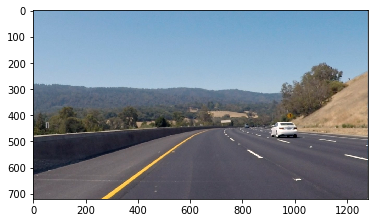

In [4]:
image = mpimg.imread("images/curved_lane.jpg")

plt.imshow(image)

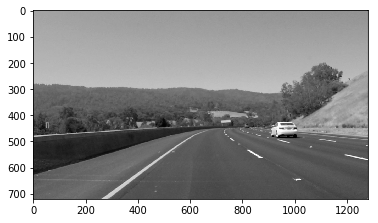

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')


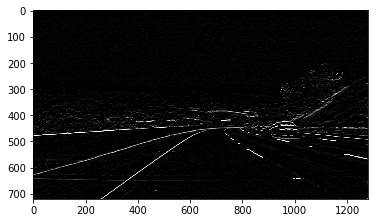

In [7]:
sobel_filter = np.array([[-1,-2,-1],
                         [0,0,0],
                         [1,2,1]])

filter_image = cv2.filter2D(gray, -1, sobel_filter)

plt.imshow(filter_image, cmap='gray')

## Gaussian Blur

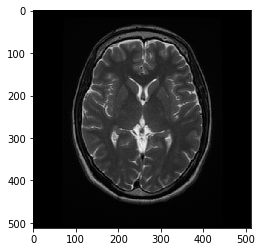

In [13]:
human_brain = cv2.imread('images/brain.jpg')
plt.imshow(human_brain)

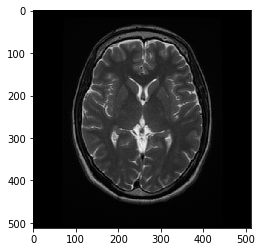

In [14]:
# Make a copy of the brain
brain = np.copy(human_brain)

# Change color to RGB (from BGR)
brain = cv2.cvtColor(brain, cv2.COLOR_BGR2RGB)

plt.imshow(brain)


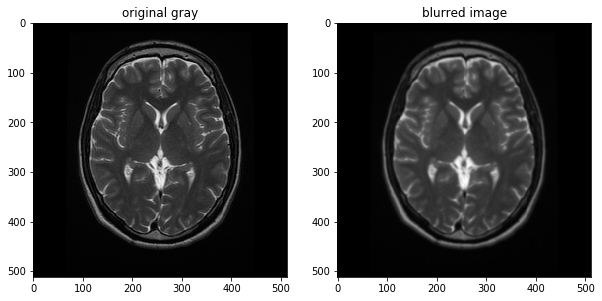

In [17]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(brain, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('original gray')
ax1.imshow(human_brain, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

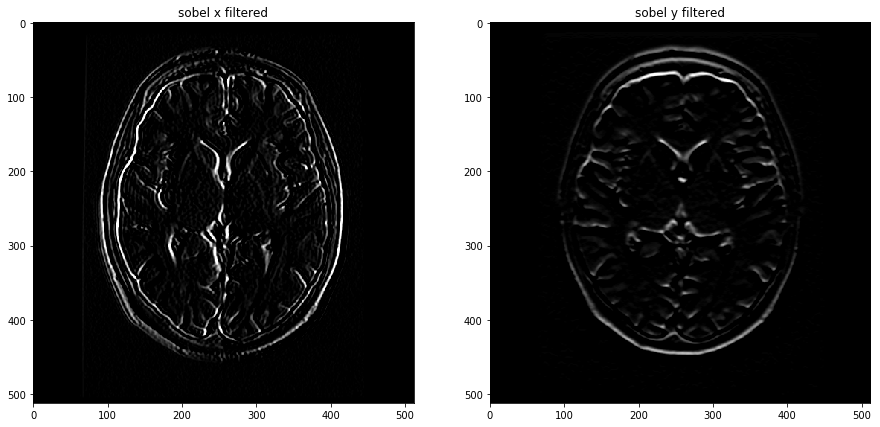

In [29]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_title('sobel x filtered')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('sobel y filtered')
ax2.imshow(filtered_blurred, cmap='gray')

## Threshhold  adjust

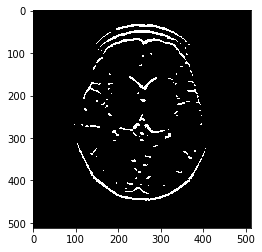

In [22]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')


## laplacian edge filter

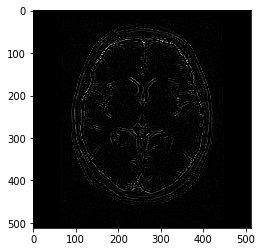

In [23]:
# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])


filter_image = cv2.filter2D(gray, -1, laplacian)

plt.imshow(filter_image, cmap='gray')


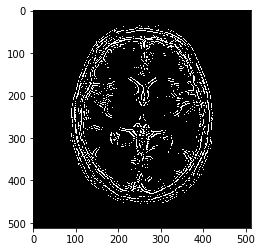

In [26]:
retval, binary_image = cv2.threshold(filter_image, 10, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')


## Canny edge detection

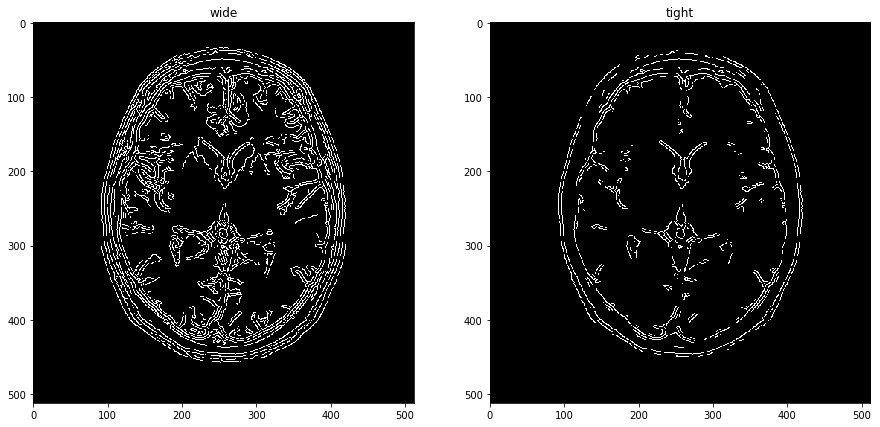

In [28]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
 
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

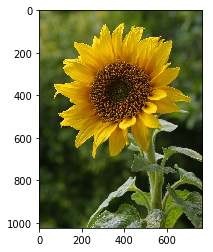

In [35]:
sun_flower = cv2.imread('images/flower.jpg')

flower = np.copy(sun_flower)

flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)

plt.imshow(flower)


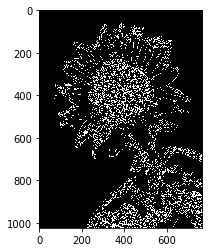

In [36]:
flower = cv2.cvtColor(flower, cv2.COLOR_RGB2GRAY)
lower_threshold = 30
upper_threshold = 100
edge = cv2.Canny(flower,lower_threshold,upper_threshold)
plt.imshow(edge, cmap='gray')

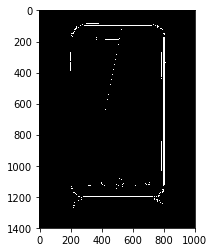

In [58]:
cat1 = cv2.imread('images/cellphone.jpg')
cat1 = cv2.cvtColor(cat1, cv2.COLOR_BGR2RGB)

cat = np.copy(cat1)

cat = cv2.cvtColor(cat, cv2.COLOR_RGB2GRAY)
lower_threshold = 50
upper_threshold = 100
edge = cv2.Canny(cat,lower_threshold,upper_threshold)
plt.imshow(edge, cmap='gray')

## Hough line transform

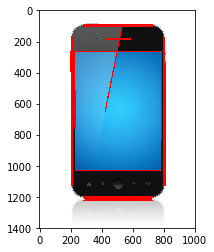

In [60]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 10
min_line_length = 100
max_line_gap = 5

line_image = np.copy(cat1) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edge, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)